In [1]:
library('ggplot2')

In [2]:
get_trials_per_participant = function(ed_df){
    trials_per_participant = aggregate(Trial ~ session_id + type, subset(ed_df, !exclude_trial), 
          function(x){length(unique(x))})    
    return(trials_per_participant)
}

prop_target_or_distractor = function(x){
    1 - table(x)['OTHER'] / sum(table(x))
}

get_lost_frames_per_participant = function(ed_df){
    lost_frames_per_participant = aggregate(CURRENT_FIX_INTEREST_AREA_LABEL ~ session_id + type, 
    subset(ed_df, !exclude_trial & timeBin > -2000 & timeBin < 6000), function(x){prop_target_or_distractor(x)})    
    return(lost_frames_per_participant)    
}

check_trial_durations = function(ed_df){
    return(aggregate(timeBin ~ session_id, 
    subset(ed_df, !exclude_trial), function(x){range(x)}))
}

### Load frame data from LookIt and the In-Lab analysis

In [3]:
lookit_ed_df = read.csv('csv/lookit_ed_df.csv') 
lookit_ed_df$type = 'lookit'

In [4]:
inlab_ed_df = read.csv('csv/inlab_ed_df.csv') 

In [5]:
# prep in-lab data so it is consistent with LookIt
inlab_ed_df$Trial = inlab_ed_df$TRIAL_INDEX
inlab_ed_df$session_id = inlab_ed_df$participant_name
inlab_ed_df$CURRENT_FIX_INTEREST_AREA_LABEL = as.character(inlab_ed_df$CURRENT_FIX_INTEREST_AREA_LABEL)
inlab_ed_df$CURRENT_FIX_INTEREST_AREA_LABEL[
    inlab_ed_df$CURRENT_FIX_INTEREST_AREA_LABEL == "."] = "OTHER"
inlab_ed_df$adult_or_child = inlab_ed_df$type
inlab_ed_df$type = paste('inlab -', inlab_ed_df$type,'-',inlab_ed_df$expt_version)

### Number of Usable Trials Per Participant

In [6]:
lookit_trials_per_participant = get_trials_per_participant(lookit_ed_df)
inlab_trials_per_participant = get_trials_per_participant(inlab_ed_df)
trials_per_participant = rbind(lookit_trials_per_participant, inlab_trials_per_participant)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



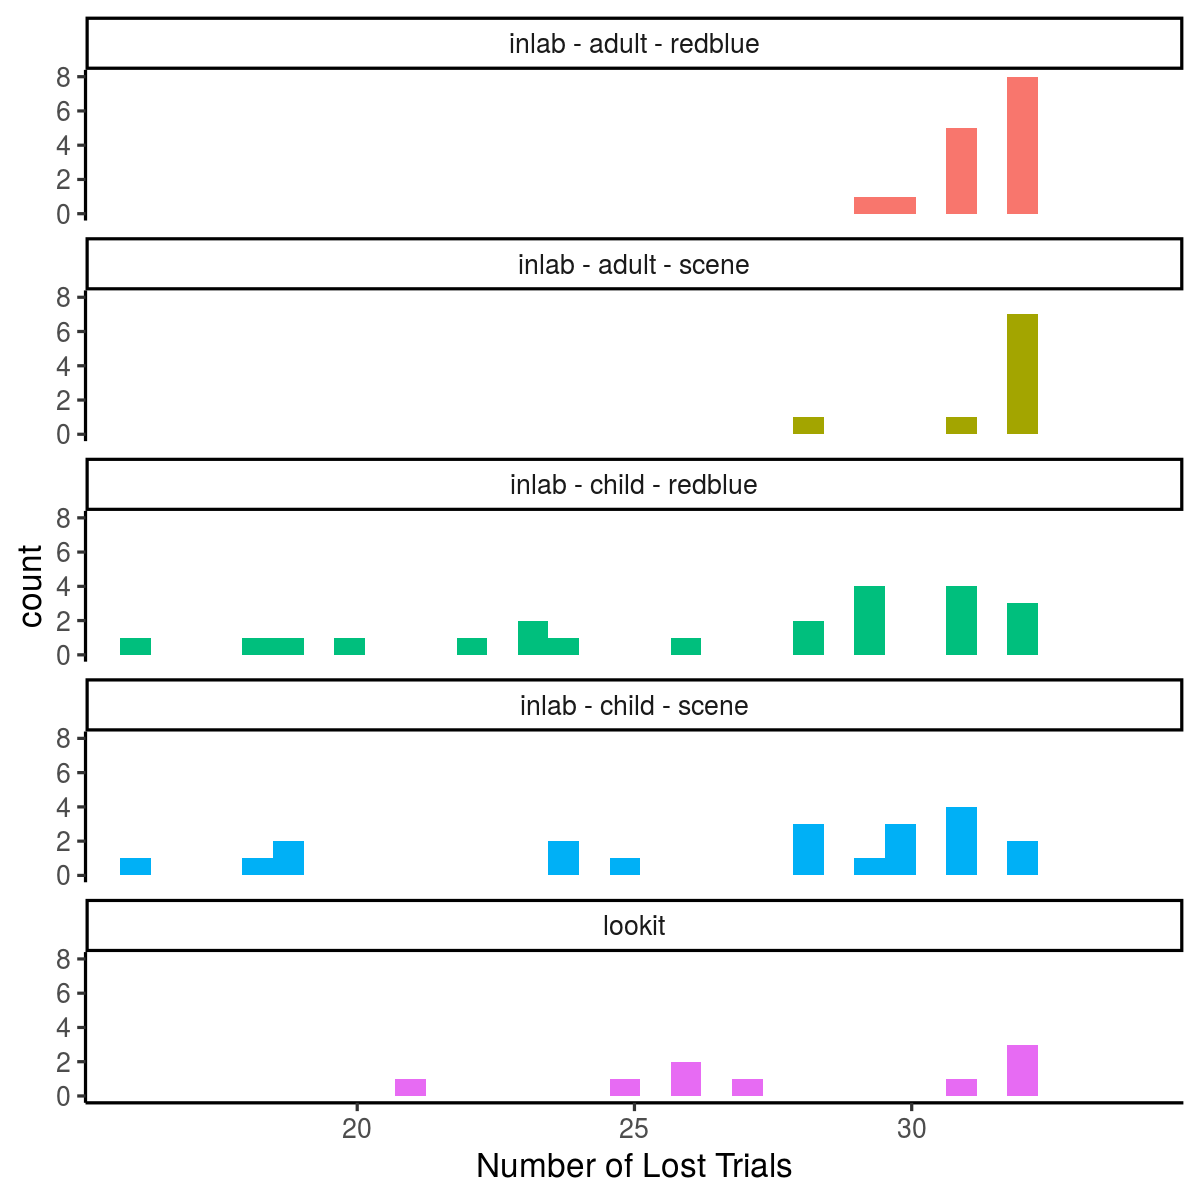

In [7]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(trials_per_participant) + geom_histogram(aes(x=Trial, fill=type)) + coord_cartesian(
xlim = c(16, 34)) + facet_wrap(~type, ncol=1) + theme_classic(base_size=20) + theme(
legend.position = "none") + xlab("Number of Lost Trials")

#### What Proportion of Frames are to the Target or Distractor?

In [8]:
lost_frames_per_lookit_participant = get_lost_frames_per_participant(lookit_ed_df)
lost_frames_per_inlab_participant = get_lost_frames_per_participant(inlab_ed_df)
lost_frames_per_participant = rbind( 
    lost_frames_per_lookit_participant,
    lost_frames_per_inlab_participant)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



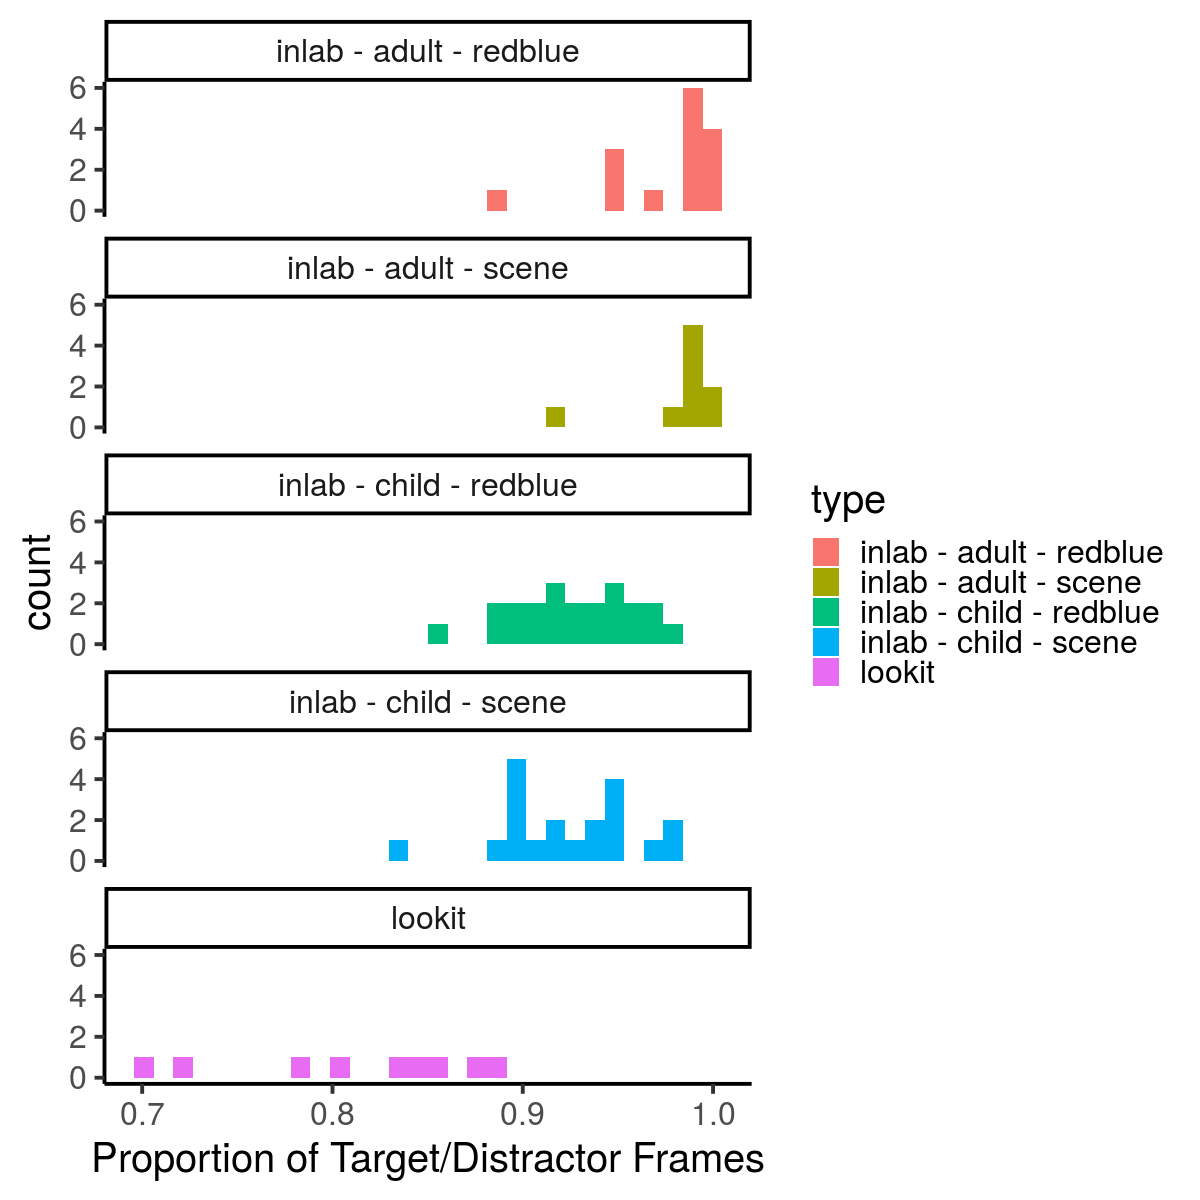

In [9]:
ggplot(lost_frames_per_participant) + geom_histogram(aes(x=CURRENT_FIX_INTEREST_AREA_LABEL,
fill = type)) + xlab('Proportion of Target/Distractor Frames') + theme_classic(base_size=24
) + facet_wrap(~type, ncol=1)

### What is the Composition of non-TD Frames?

In [17]:
non_td_frames = subset(lookit_ed_df, CURRENT_FIX_INTEREST_AREA_LABEL == "OTHER" & timeBin >= -4000)
non_td_props = do.call('rbind', lapply(unique(non_td_frames$session_id), function(x){
    df = subset(non_td_frames, session_id == x)
    return( data.frame(session = x, 
                             prop = table(df$label) / sum(table(df$label))))
    
}))
names(non_td_props) = c('session_id','label','prop')
non_td_props

session_id,label,prop
<fct>,<fct>,<dbl>
019e5595-bffa-4ab1-935c-a501119f1380,away,0.529907825
019e5595-bffa-4ab1-935c-a501119f1380,blurry,0.000000000
019e5595-bffa-4ab1-935c-a501119f1380,center,0.065699157
019e5595-bffa-4ab1-935c-a501119f1380,eyes closed,0.020200039
019e5595-bffa-4ab1-935c-a501119f1380,frozen,0.000000000
019e5595-bffa-4ab1-935c-a501119f1380,left,0.000000000
019e5595-bffa-4ab1-935c-a501119f1380,missing,0.005687390
019e5595-bffa-4ab1-935c-a501119f1380,missing child,0.246715042
019e5595-bffa-4ab1-935c-a501119f1380,missing data,0.005295156


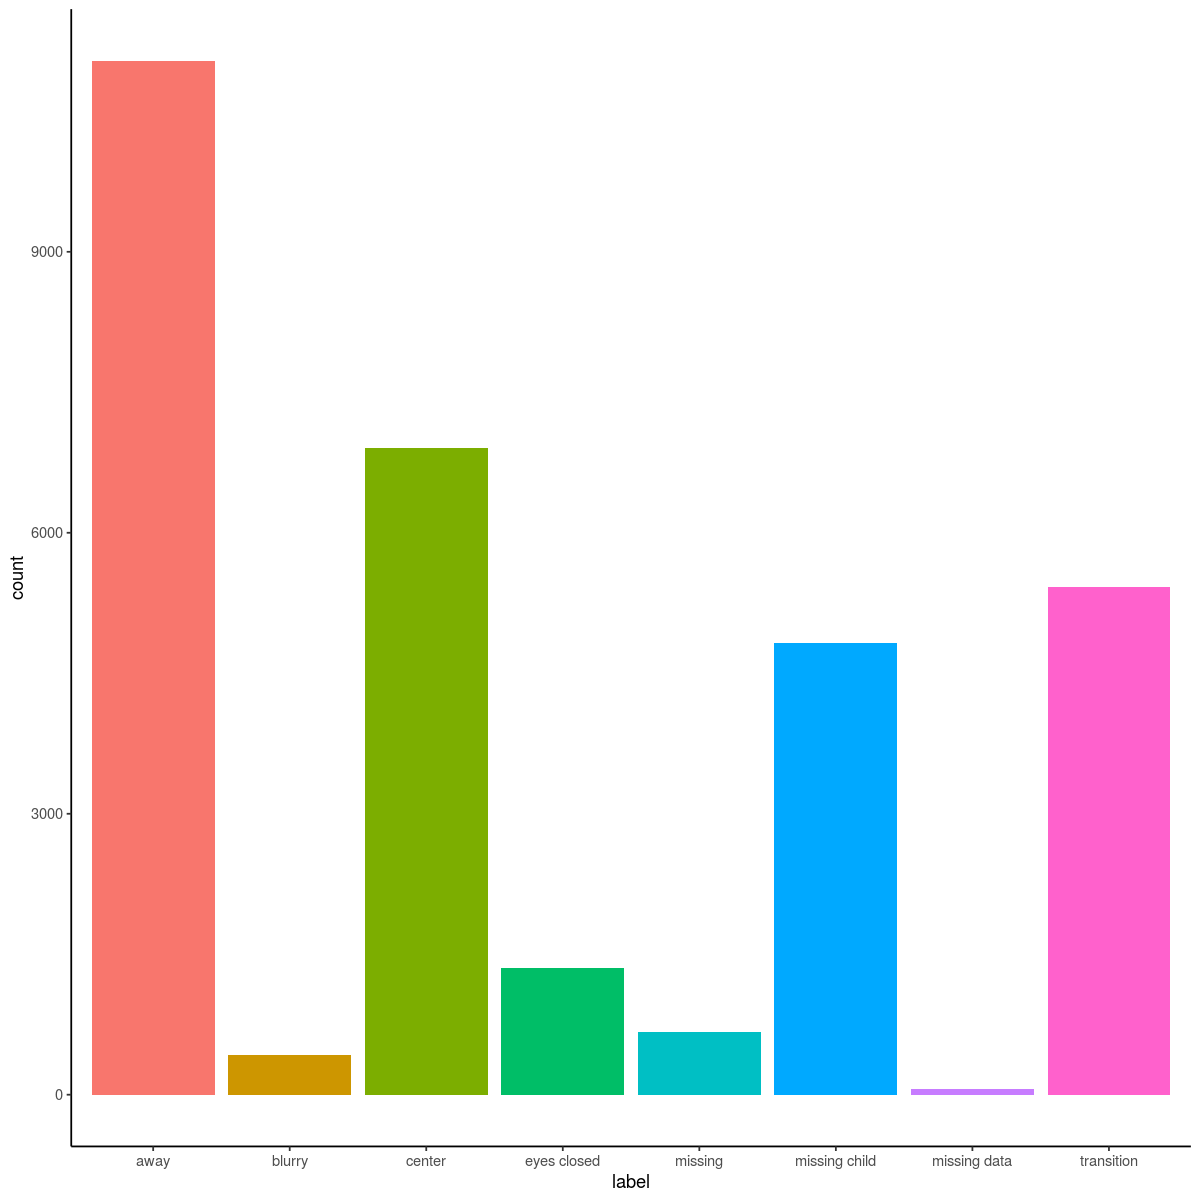

In [18]:
ggplot(non_td_frames) + geom_bar(aes(x= label, fill=label), position='stack'
) + theme_classic() + theme(legend.position="none")

In [20]:
nrow(subset(non_td_frames, label == 'away')) / nrow(subset(lookit_ed_df, timeBin >= -4000))
# 13% missing due to "away", more than any of the in-lab studies
# huge proportion of center looks

[1] 0.1281667

In [21]:
nrow(subset(non_td_frames, label == 'center')) / nrow(subset(lookit_ed_df, timeBin >= -4000))

[1] 0.08022756

In [22]:
nrow(subset(non_td_frames, label %in%  c('missing','missing child'))) / nrow(subset(lookit_ed_df, timeBin >= -4000))

[1] 0.0637873

In [24]:
nrow(subset(non_td_frames, label == "transition")) / nrow(subset(lookit_ed_df, timeBin >= -4000))

[1] 0.06296296

### Is this excluding unusually long recordings?

In [13]:
check_trial_durations(lookit_ed_df)

session_id,timeBin
<fct>,"<int[,2]>"
019e5595-bffa-4ab1-935c-a501119f1380,"-6050, 6800"
1e04539d-c09d-4f71-96a4-5e01bb073d67,"-6000, 6950"
1e8ae9b0-6b68-4636-a983-4e53b2522fce,"-6500, 19900"
7dc30b41-8f08-466d-b342-7da585ba84eb,"-7350, 7000"
91fe4cd9-4225-4866-8766-da0bd1bb3f0c,"-6400, 7200"
983f28e8-40ac-4226-9968-47562ab5c8de,"-6000, 6600"
9a9fe8f1-c7ba-4d57-baef-2c8fb7a79035,"-7100, 7000"
9cbb4790-a33d-471a-831f-20d4bad97550,"-6000, 6950"
c55ba08f-225c-4631-b4f8-cf447fb54c61,"-6000, 7000"


In [14]:
# Generally yes, one exception of a 20s long recording for 1e8